<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2020-2021/Practicas/Pr8_Kolmogorov_Smirnov_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 8: Test de Kolmogorov-Smirnov 1/2**

<hr>

**Objectivo de la práctica** 

Ver como aplicar el método de Kolmogorov-Smirnov para estimar parámetros de una distribución, dada una muestra de valores independientes que siguen la distribución.

En esta práctica vamos a aplicar el método de Kolmogorov-Smirnov para encontrar el parámetro $\sigma$ de una distribución Gaussiana. 

<hr>

### <font color='orange'>**> Python #1**</font>

Considera esta muestra de 50 puntos, que siguen una distribución Gaussiana:

[22.3,12.9,-10.1,-36.9,-38.5,-23.4,-4.3,5.5,48.8,20.5,18.1,8.3,-37.2,-8.1,-5.6,41.4,-6.5,-16.7,-12.8,-30.0,11.9,-12.6,6.6,-24.8,6.0,34.5,-31.2,63.3,-19.8,22.1,-42.5,18.9,-0.0,-13.1,-37.4,-68.1,20.7,59.1,-37.0,-31.9,-92.2,-29.9,11.9,6.5,13.8,2.6,-33.9,27.3,17.8,-18.6]

Vamos a usar el método de Komogorov-Smirnov para calcular la $\sigma_{óptima}$, la que mejor ajusta a la distribución de probabilidad de la muestra.

Primero vamos a calcular el valor medio ($\mu_m$) y la varianza ($\sigma_m$) de la muestra, ya que sabemos que son buenos estimadores:

Mean = -4.45
Sigma = 30.35


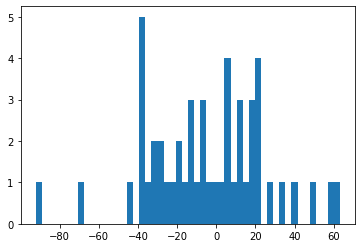

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

a = [22.3,12.9,-10.1,-36.9,-38.5,-23.4,-4.3,5.5,48.8,20.5,18.1,8.3,-37.2,-8.1,-5.6,
     41.4,-6.5,-16.7,-12.8,-30.0,11.9,-12.6,6.6,-24.8,6.0,34.5,-31.2,63.3,-19.8,22.1,
     -42.5,18.9,-0.0,-13.1,-37.4,-68.1,20.7,59.1,-37.0,-31.9,-92.2,-29.9,11.9,6.5,
     13.8,2.6,-33.9,27.3,17.8,-18.6]

# imprime valor medio y raiz cuadrada de la variancia = sigma

print("Mean = {:.2f}".format(np.mean(a)))
print("Sigma = {:.2f}".format(np.std(a)))


### <font color='green'>**> Ejercicio #1**</font>

<hr>

<font color='green'>Esta práctica de 1h no tiene entrega, pero se tienen que realizar los ejercicios de programación durante la clase...</font>

<hr>

Podemos calcular los parámetros óptimos que se ajustan mejor a tu muestra usando la función cumulativa de tu muestra y comparando con diferentes funciones cumulativas de prueba (que van cambiando sus parámetros).

Para cada punto de tu muestra puedes calcular la diferencia de la función cumulativa de tu muestra con el valor cumulativo que obtienes con la función de test en ése mismo punto, y quedarte con el valor de desviación máxima: el método simple de Kolmogorov-Smirnov (KS). La función de test que mejor se ajusta es aquella que está 'más' cerca de tu función cumulativa de muestra de acuerdo con esta distancia $d_{max}$. Usando diferentes distribuciones de test, uno puede obtener aquella que minimiza $d_{max}$.

En nuestro caso, para cada distribución de test $i$, el valor $d_{max,i}$ se calcula para cada función de test $i$ como:

<br>

$$
d_{max,i} = max_{n=1}^{50}( | CDF_{muestra}(x_n) - CDF_{Gaussiana}(x_n, \mu_m, \sigma_i) | )
$$

<br>

Primero vamos a hacer una gráfica de la función cumulativa de la muestra: en este caso, para cada valor $𝑥_i$ de tu muestra, la función cumulativa incrementa en un factor 1/50, así hasta llegar a un valor máximo de 1. 

También vamos a dibujar 2 funciones cumulativas de test, para ver como se acercan a la función cumulativa de tu muestra. Considera dos gaussianas con valor medio $\mu$=-4.45 (valor obtenido antes) y $\sigma_1$=10 y $\sigma_2$=28.

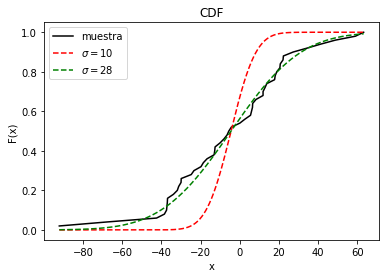

In [ ]:
# Ordena tu muestra usando la función np.sort() y construye la y cumulativa
b = np.sort(a)
cummuestra=np.linspace(1/len(b),1,len(b))


# Genera los pares de puntos (x,y) para las dos gaussianas con sigma1 = 10 y sigma2 = 28
s1 = 10
s2 = 28
x = np.linspace(np.min(b),np.max(b),1000)
y1 = ss.norm.cdf(x,loc=np.mean(a),scale=s1)
y2 = ss.norm.cdf(x,loc=np.mean(a),scale=s2)

# Haz las gráficas, con sus labels

plt.plot(b,cummuestra,'k-',label='muestra')
plt.plot(x,y1,'r--',label=r'$\sigma={}$'.format(s1))
plt.plot(x,y2,'g--',label=r'$\sigma={}$'.format(s2))
plt.legend(loc='best')
plt.title("CDF")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()



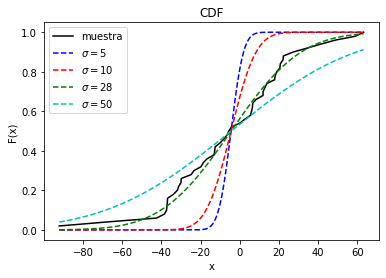

In [ ]:
b = np.sort(a)
cummuestra=np.linspace(1/len(b),1,len(b))

def plotCDF(sigma,mean,color):
  x = np.linspace(np.min(b),np.max(b),1000)
  y = ss.norm.cdf(x,loc=mean,scale=sigma)
  plt.plot(x,y,color+'--',label=r'$\sigma={}$'.format(sigma))


plt.plot(b,cummuestra,'k-',label='muestra')
plotCDF(5,np.mean(a),'b')
plotCDF(10,np.mean(a),'r')
plotCDF(28,np.mean(a),'g')
plotCDF(50,np.mean(a),'c')
plt.legend(loc='best')
plt.title("CDF")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()



### <font color='orange'>**> Python #2**</font>

Vamos a calcular ahora la $\sigma_{óptima}$ usando la función cumulativa de tu muestra y comparando con diferentes funciones cumulativas de test. Fija el valor medio de la distribución Gaussiana en $\mu_m$ y considera 1000 pasos equidistantes entre $\sigma_{inf}$=15 y $\sigma_{sup}$=45. En este caso, para cada valor $x_i$ de tu muestra, la función cumulativa te incrementa en un factor 1/50, y queda fijada. 

Haz una gráfica de los valores $d_{max}$ en el rango [$\sigma_{inf}$,$\sigma_{sup}$] y evalúa cual es el $\sigma_{óptimo}$ (el que minimiza la función $d_{max}$). El valor $d_{max,i}$ se calcula para cada función de test $i$ como:

<br>

$$
d_{max,i} = max_{n=1}^{50}( | CDF_{muestra}(x_n) - CDF_{Gaussiana}(x_n, \mu_m, \sigma_i) | )
$$

<br>

In [ ]:
# Haz un bucle en el rango de sigmas de test, y calcula para cada una de ellas dmax

# Haz una gráfica de dmax vs sigmas de test

# Imprime el valor de sigma que minimiza dmax:


### <font color='red'>**> Material Adicional**</font>

Para estar menos afectado por las colas de las distribuciones, se usan métodos en KS donde se introduce el concepto de 'peso': es decir, tener más en cuenta los valores más probables y menos las colas. 

Una variante más completa de Kolmogorov-Smirnov se emplea a menudo. Para cada punto de tu muestra puedes calcular la diferencia de la función cumulativa de tu muestra con el valor cumulativo que obtienes con la función de test en ése mismo punto, aplicando un peso y haciendo una suma cumulativa de las diferencias o distancias $d_{KS}$. En vez de usar la desviación máxima, para cada punto de evaluación, se multiplica la distancia por el valor de la pdf en aquel punto (para que pesen más los valores más probables), y se suman todos los valores absolutos de distancias que se evalúan para cada punto, así se promedian todas las diferencias.

En este ejemplo, sería aplicar esta fórmula:

$$
d_{KS_i} = \sum_{n=1}^{50}( | CDF_{muestra}(x_n) - CDF_{Gaussiana}(x_n,\mu,\sigma_i) | · PDF_{Gaussiana}(x_n,\mu,\sigma_i) )
$$

<br>